# 3. Exploratory Data Analysis (EDA) for QB Data (1996-2016)

## 3.1 Contents<a id='3.1_Contents'></a>
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load the Data](#3.4_Load_the_Data)
  * [3.5 Clean the QB Data](#3.5_Clean_the_QB_Data)
      * [3.5.1 Delete the unnamed Column](#3.5.1_Delete_the_unnamed_Column)
      * [3.5.2 Correct the Rate Column](#3.5.2_Correct_the_Rate_Column)
      * [3.5.3 Turn comp % NaNs as 0](#3.5.3_Turn_comp_%_NaNs_as_0)
      * [3.5.4 YPC NaNs into 0](#3.5.4_ypc_NaNs_into_0)
      * [3.5.5 Td_per_cmp NaNs into 0](#3.5.5_td_per_cmp_NaNs_into_0)
      * [3.5.6 Td per att NaNs into 0](#3.5.6_td_per_att_NaNs_into_0)
      * [3.5.7 Checkout loss yds Column](#3.5.7_Checkout_loss_yds_Column)
  * [3.6 Cleaned up Data](#3.6_Cleaned_up_Data)
  * [3.7 Histograms](#3.7_Histograms)
      * [3.7.1 Completions Histogram](#3.7.1_Completions_Histogram)
      * [3.7.2 Completion Percentage Histogram](#3.7.2_Completion_Percentage_Histogram)
      * [3.7.3 Attemps Histogram](#3.7.3_Attempts_Histogram)
      * [3.7.4 Touchdown Histogram](#3.7.4_Touchdown_Histogram)
      * [3.7.5 Rate Histogram](#3.7.5_Rate_Histogram)
  * [3.8 Distribution of Data](#3.8_Distribution_of_Data)
      * [3.8.1 QB Rate & TDs](#3.8.1_QB_Rate_&_TDs)
      * [3.8.2 The difference between Home and Away QB Ratings](#3.8.2_The_difference_between_Home_and_Away_QB_Ratings)
      * [3.8.3 Home & Away Completion Percentage](#3.8.3_Home_&_Away_Completion_Percentage)
      * [3.8.4 Home & Away TDs](#3.8.4_Home_&_Away_TDs)
  * [3.9 Heat Map of QB Data](#3.9_Heat_Map_of_QB_Data)
  * [3.10 Correlated Variables](#3.10_Correlated_Variables)
      * [3.10.1 Attempts & Completions .94 (Positive)](#3.10.1_Attempts_&_Completions_.94_(Positive))
      * [3.10.2 Sack & loss_yds .91 (Positive)](#3.10.2_Sack_&_loss_yds_.91_(Positive))
      * [3.10.3 Interceptions & Rate -.44 (Negative)](#3.10.3_Interceptions_&_Rate_-.44_(Negative))
      * [3.10.4 Game Points & Loss yards -.23 (Negative)](#3.10.4_Game_Points_&_Loss_yards_-.23 (Negitive))
      * [3.10.5 Pair Plot of all QB Data](#3.10.5_Pair_Plot_of_all_QB_Data)
      * [3.10.6 Mean, Standard Deviation, Min, Max, 25, 50, 75th percentile](#3.10.6_Mean,_Standard_Deviation,_Min,_Max,_25,_50,_75th_percentile)
  * [3.11 Looking at the Dataframe](#3.11_Looking_at_the_Dataframe)
  * [3.12 Save the new Dataframe](#3.12_Save_the_new_Dataframe)
  * [3.13 Conclusion](#3.13_Conclusion)
  
 

## 3.2 Introduction <a id='3.2_Introduction'></a>

In this stage to create a more comprehensive QB rating we will use EDA to review data relationships. Also to perform summary statistics, and create data visualizations from the QB data. We will need to clean the data a little more to insure that we have accurate or relevant information for the heat maps, scatter plots, etc. These visualizations will help us to make a good decisions on what to during the training and modeling stages.

We need to find which variables have a big effect on the current QB rating. As well as which variables have a big impact on the other variables. We need to locate which columns do not have an impact on the other variables and current QB rating in a heat map. This will give us an idea of what to not put an emphasis on in the new QB rating. 


# 3.3 Imports<a id='3.2_Imports'></a>   

In [1]:
#import the relavent packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.4 Load the Data <a id='3.4_Load_the_Data'></a>

In [2]:
# this is the supplied QB CSV data file 
df= pd.read_csv('QB_stats.csv')

In [3]:
df.shape

(13185, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13185 entries, 0 to 13184
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13185 non-null  int64  
 1   qb           13185 non-null  object 
 2   cmp          13185 non-null  int64  
 3   att          13185 non-null  int64  
 4   comp %       13185 non-null  float64
 5   yds          13185 non-null  float64
 6   td           13185 non-null  int64  
 7   int          13185 non-null  int64  
 8   rate         13171 non-null  float64
 9   long         13171 non-null  float64
 10  sack         13185 non-null  float64
 11  game_points  13185 non-null  int64  
 12  ypa          13185 non-null  float64
 13  ypc          12466 non-null  float64
 14  td_per_cmp   12466 non-null  float64
 15  td_per_att   13088 non-null  float64
 16  loss_yds     13171 non-null  float64
 17  home_away    13185 non-null  object 
 18  year         13185 non-null  int64  
dtypes: f

In [5]:
df.head()

Unnamed: 0                        qb  cmp  att  comp %    yds  td  int  \
0           0  Boomer EsiasonB. Esiason   25   38    65.8  237.0   0    0   
1           1   Jim HarbaughJ. Harbaugh   16   25    64.0  196.0   2    1   
2           2      Paul JustinP. Justin    5    8    62.5   53.0   0    0   
3           3      Jeff GeorgeJ. George   16   35    45.7  215.0   0    0   
4           4   Kerry CollinsK. Collins   17   31    54.8  198.0   2    0   

   rate  long  sack  game_points  ypa   ypc  td_per_cmp  td_per_att  loss_yds  \
0  82.9  20.0   2.0           13  6.2   9.5       0.000       0.000      11.0   
1  98.1  35.0   0.0           20  7.8  12.2       0.125       0.080       0.0   
2  81.8  30.0   1.0           20  6.6  10.6       0.000       0.000      11.0   
3  65.8  55.0   7.0            6  6.1  13.4       0.000       0.000      53.0   
4  95.9  30.0   4.0           29  6.4  11.6       0.118       0.065      12.0   

  home_away  year  
0      away  1996  
1      home  1996  
2      home  1996  
3      away  1996  
4      home  1996

# 3.5 Clean the QB Data <a id='3.5_Clean_the_QB_Data'></a>

We should clean up eight columns, unnamed, rate, comp %, ypc, td_per_cmp, td_per_att, loss_yds and long using the mean median or 0, etc.

### 3.5.1 Delete the unnamed Column <a id='3.5.1_Delete_the_unnamed_Column'></a>

In [6]:
#Deleting the column with numbers. No information from this column is useful.
df = df.drop(df.columns[0], axis=1)

### 3.5.2 Correct the Rate Column <a id='3.5.2_Correct_the_Rate_Column'></a>

In [7]:
df[df['rate'].isnull()]

qb  cmp  att  comp %   yds  td  int  \
8593                   Tatum BellT. Bell   46   16   287.5  2.88   1    0   
8594           Michael PittmanM. Pittman   40    8   500.0  5.00   0    0   
8595           Shaud WilliamsS. Williams   31    7   442.9  4.43   0    0   
8596        Brooks BollingerB. Bollinger    3    2   150.0  1.50   0    0   
8597               Shannon WoodsS. Woods   32   12   266.7  2.67   0    0   
8598                   Quinn GrayQ. Gray   10    2   500.0  5.00   0    0   
8599                   Charles AliC. Ali    7    3   233.3  2.33   0    0   
8600               Ingle MartinI. Martin    4    3   133.3  1.33   0    0   
8642           Michael PittmanM. Pittman   58   18   322.2  3.22   2    0   
8643                   Tatum BellT. Bell   43    9   477.8  4.78   0    0   
8644            Andrew PinnockA. Pinnock    1    2    50.0  0.50   1    0   
8645                    Cory RossC. Ross   45   19   236.8  2.37   0    0   
8646  John David WashingtonJ. Washington   20    5   400.0  4.00   0    0   
8647                   Shane BoydS. Boyd    5    4   125.0  1.25   0    0   

      rate  long  sack  game_points   ypa  ypc  td_per_cmp  td_per_att  \
8593   NaN   NaN   0.0           24  17.0  0.1       0.022       0.062   
8594   NaN   NaN   0.0           24  20.0  0.1       0.000       0.000   
8595   NaN   NaN   0.0           24  17.0  0.1       0.000       0.000   
8596   NaN   NaN   0.0           24   4.0  0.5       0.000       0.000   
8597   NaN   NaN   0.0            6   7.0  0.1       0.000       0.000   
8598   NaN   NaN   0.0            6   8.0  0.5       0.000       0.000   
8599   NaN   NaN   0.0            6   4.0  0.3       0.000       0.000   
8600   NaN   NaN   0.0            6   8.0  0.3       0.000       0.000   
8642   NaN   NaN   0.0           34   9.0  0.1       0.034       0.111   
8643   NaN   NaN   0.0           34  18.0  0.1       0.000       0.000   
8644   NaN   NaN   0.0           34   1.0  0.5       1.000       0.500   
8645   NaN   NaN   0.0           27   8.0  0.1       0.000       0.000   
8646   NaN   NaN   0.0           27   7.0  0.2       0.000       0.000   
8647   NaN   NaN   0.0           27   8.0  0.2       0.000       0.000   

      loss_yds home_away  year  
8593       NaN      away  2009  
8594       NaN      away  2009  
8595       NaN      away  2009  
8596       NaN      away  2009  
8597       NaN      home  2009  
8598       NaN      home  2009  
8599       NaN      home  2009  
8600       NaN      home  2009  
8642       NaN      away  2009  
8643       NaN      away  2009  
8644       NaN      away  2009  
8645       NaN      home  2009  
8646       NaN      home  2009  
8647       NaN      home  2009

Here we can see that these players had more completetions that attempts, (lol) which is impoosible. Also players like Michael Pittman, Tatum Bell, Cory Ross do not play the QB positon. We should probably check where other QBs had more completions than attempts. We should delete these rows since they do not help with our project.

In [8]:
np.where(df['cmp'] > df['att'])

(array([8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8642, 8643, 8645,
        8646, 8647], dtype=int64),)

In [9]:
#drop the inacurate rates, keep 8644, Andrew Pinnock as that looks acurate.
df.drop([8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600],0,inplace=True)
df.drop([8642,8643,8645,8646,8647],0,inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_14396/472250601.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop([8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600],0,inplace=True)
C:\Users\user\AppData\Local\Temp/ipykernel_14396/472250601.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop([8642,8643,8645,8646,8647],0,inplace=True)


In [10]:
df[df['rate'].isnull()]

qb  cmp  att  comp %  yds  td  int  rate  long  \
8644  Andrew PinnockA. Pinnock    1    2    50.0  0.5   1    0   NaN   NaN   

      sack  game_points  ypa  ypc  td_per_cmp  td_per_att  loss_yds home_away  \
8644   0.0           34  1.0  0.5         1.0         0.5       NaN      away   

      year  
8644  2009

Pinnocks passer rating would be 95.83 with 1/2, (cmp/att), one touchdown and no interceptions, (https://www.pro-football-reference.com/about/qb-rating.htm). Lets change the long (pass) to 1 and 0 for loss_yds since he did nt get sacked. 

In [11]:
df['rate'] = df['rate'].replace(np.nan, 95.83)

In [12]:
df['long'] = df['long'].replace(np.nan, 1)

In [13]:
df['loss_yds'] = df['loss_yds'].replace(np.nan, 0)

In [14]:
df.loc[df['rate'] == 95.83]

qb  cmp  att  comp %  yds  td  int   rate  long  \
8644  Andrew PinnockA. Pinnock    1    2    50.0  0.5   1    0  95.83   1.0   

      sack  game_points  ypa  ypc  td_per_cmp  td_per_att  loss_yds home_away  \
8644   0.0           34  1.0  0.5         1.0         0.5       0.0      away   

      year  
8644  2009

Looks good!

In [15]:
np.where(df['cmp'] > df['att'])

(array([], dtype=int64),)

Here we do not have any other values where it was incorrectly inputted that the QB had more completions than attempts

### 3.5.3 Turn comp % NaNs as 0 <a id='3.5.3_Turn_comp_%_NaNs_as_0'></a>

In [16]:
df[df['comp %'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

Here we can see that QB took a sack and the the data was inputted as NaN for comp %. We can fill these values in as 0

In [17]:
df['comp %'] = df['comp %'].replace(np.nan, 0)

In [18]:
df[df['comp %'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

All cleaned up!

### 3.5.4 YPC NaNs into 0 <a id='3.5.4_ypc_NaNs_into_0'></a>

In [19]:
df[df['ypc'].isnull()]

qb  cmp  att  comp %  yds  td  int  rate  \
19         Kordell StewartK. Stewart    0    2     0.0  0.0   0    0  39.6   
28               Elvis GrbacE. Grbac    0    2     0.0  0.0   0    0  39.6   
32          Bill MusgraveB. Musgrave    0    1     0.0  0.0   0    0  39.6   
55                   Tom TupaT. Tupa    0    1     0.0  0.0   0    0  39.6   
66        Sean SalisburyS. Salisbury    0    1     0.0  0.0   0    1   0.0   
...                              ...  ...  ...     ...  ...  ..  ...   ...   
13123  Larry FitzgeraldL. Fitzgerald    0    1     0.0  0.0   0    0  39.6   
13153    Antonio MorrisonA. Morrison    0    1     0.0  0.0   0    0  39.6   
13155    Jimmy GaroppoloJ. Garoppolo    0    1     0.0  0.0   0    0  39.6   
13161              Shaun HillS. Hill    0    1     0.0  0.0   0    0  39.6   
13176         Pharoh CooperP. Cooper    0    1     0.0  0.0   0    1   0.0   

       long  sack  game_points  ypa  ypc  td_per_cmp  td_per_att  loss_yds  \
19      0.0   0.0            9  0.0  NaN         NaN         0.0       0.0   
28      0.0   0.0           27  0.0  NaN         NaN         0.0       0.0   
32      0.0   0.0           31  0.0  NaN         NaN         0.0       0.0   
55      0.0   0.0           10  0.0  NaN         NaN         0.0       0.0   
66      0.0   0.0           27  0.0  NaN         NaN         0.0       0.0   
...     ...   ...          ...  ...  ...         ...         ...       ...   
13123   0.0   0.0           34  0.0  NaN         NaN         0.0       0.0   
13153   0.0   0.0           24  0.0  NaN         NaN         0.0       0.0   
13155   0.0   0.0           35  0.0  NaN         NaN         0.0       0.0   
13161   0.0   0.0           38  0.0  NaN         NaN         0.0       0.0   
13176   0.0   0.0            6  0.0  NaN         NaN         0.0       0.0   

      home_away  year  
19         away  1996  
28         home  1996  
32         home  1996  
55         away  1996  
66         home  1996  
...         ...   ...  
13123      away  2016  
13153      home  2016  
13155      away  2016  
13161      home  2016  
13176      home  2016  

[719 rows x 18 columns]

In [20]:
df['ypc'] = df['ypc'].replace(np.nan, 0)

In [21]:
df[df['ypc'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

### 3.5.5 td_per_cmp NaNs into 0 <a id='3.5.5_td_per_cmp_NaNs_into_0'></a>

In [22]:
df[df['td_per_cmp'].isnull()].head()

qb  cmp  att  comp %  yds  td  int  rate  long  \
19   Kordell StewartK. Stewart    0    2     0.0  0.0   0    0  39.6   0.0   
28         Elvis GrbacE. Grbac    0    2     0.0  0.0   0    0  39.6   0.0   
32    Bill MusgraveB. Musgrave    0    1     0.0  0.0   0    0  39.6   0.0   
55             Tom TupaT. Tupa    0    1     0.0  0.0   0    0  39.6   0.0   
66  Sean SalisburyS. Salisbury    0    1     0.0  0.0   0    1   0.0   0.0   

    sack  game_points  ypa  ypc  td_per_cmp  td_per_att  loss_yds home_away  \
19   0.0            9  0.0  0.0         NaN         0.0       0.0      away   
28   0.0           27  0.0  0.0         NaN         0.0       0.0      home   
32   0.0           31  0.0  0.0         NaN         0.0       0.0      home   
55   0.0           10  0.0  0.0         NaN         0.0       0.0      away   
66   0.0           27  0.0  0.0         NaN         0.0       0.0      home   

    year  
19  1996  
28  1996  
32  1996  
55  1996  
66  1996

In [23]:
df['td_per_cmp'] = df['td_per_cmp'].replace(np.nan, 0)

In [24]:
df[df['td_per_cmp'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

All good in the td_per_cmp column!

###  3.5.6 td_per_att NaNs into 0 <a id='3.5.6_td_per_att_NaNs_into_0'><a/>

In [25]:
df[df['td_per_att'].isnull()]

qb  cmp  att  comp %  yds  td  int  \
75          Lawrence PhillipsL. Phillips    0    0     0.0  0.0   0    0   
185                Bobby HoyingB. Hoying    0    0     0.0  0.0   0    0   
249               Browning NagleB. Nagle    0    0     0.0  0.0   0    0   
366    Abdul-Karim Al-JabbarA. Al-Jabbar    0    0     0.0  0.0   0    0   
893                    Andre ReedA. Reed    0    0     0.0  0.0   0    0   
...                                  ...  ...  ...     ...  ...  ..  ...   
11984              Antonio BrownA. Brown    0    0     0.0  0.0   0    0   
12021             Jeremy MaclinJ. Maclin    0    0     0.0  0.0   0    0   
12562             Marc MarianiM. Mariani    0    0     0.0  0.0   0    0   
12740        Odell Beckham Jr.O. Beckham    0    0     0.0  0.0   0    0   
12836        Jimmy GaroppoloJ. Garoppolo    0    0     0.0  0.0   0    0   

       rate  long  sack  game_points  ypa  ypc  td_per_cmp  td_per_att  \
75      0.0   0.0   1.0            0  0.0  0.0         0.0         NaN   
185     0.0   0.0   1.0           19  0.0  0.0         0.0         NaN   
249     0.0   0.0   1.0           28  0.0  0.0         0.0         NaN   
366     0.0   0.0   1.0           37  0.0  0.0         0.0         NaN   
893     0.0   0.0   1.0           20  0.0  0.0         0.0         NaN   
...     ...   ...   ...          ...  ...  ...         ...         ...   
11984   0.0   0.0   1.0           21  0.0  0.0         0.0         NaN   
12021   0.0   0.0   1.0           24  0.0  0.0         0.0         NaN   
12562   0.0   0.0   1.0           20  0.0  0.0         0.0         NaN   
12740   0.0   0.0   1.0           16  0.0  0.0         0.0         NaN   
12836   0.0   0.0   1.0           41  0.0  0.0         0.0         NaN   

       loss_yds home_away  year  
75         12.0      away  1996  
185        10.0      home  1996  
249         2.0      away  1996  
366         3.0      home  1996  
893        20.0      home  1997  
...         ...       ...   ...  
11984       8.0      away  2015  
12021       3.0      home  2015  
12562       3.0      home  2015  
12740       6.0      away  2016  
12836       8.0      away  2016  

[97 rows x 18 columns]

In [26]:
df['td_per_att'] = df['td_per_att'].replace(np.nan, 0)

In [27]:
df[df['td_per_att'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

Looks good!

### 3.5.7 Checkout loss_yds Column <a id='3.5.7_Checkout_loss_yds_Column'></a>

In [28]:
df[df['loss_yds'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

This column looks good after we cleaned up the row 8644, Andrew Pinnock.

### 3.5.8 Checkout long column <a id='3.5.8_Checkout_long_Column'></a>

In [29]:
df[df['long'].isnull()]

Empty DataFrame
Columns: [qb, cmp, att, comp %, yds, td, int, rate, long, sack, game_points, ypa, ypc, td_per_cmp, td_per_att, loss_yds, home_away, year]
Index: []

This column looks good as well after we cleaned up row 8644.

## 3.6 Cleaned up Data <a id='3.6_Cleaned_up_Data'></a>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13172 entries, 0 to 13184
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   qb           13172 non-null  object 
 1   cmp          13172 non-null  int64  
 2   att          13172 non-null  int64  
 3   comp %       13172 non-null  float64
 4   yds          13172 non-null  float64
 5   td           13172 non-null  int64  
 6   int          13172 non-null  int64  
 7   rate         13172 non-null  float64
 8   long         13172 non-null  float64
 9   sack         13172 non-null  float64
 10  game_points  13172 non-null  int64  
 11  ypa          13172 non-null  float64
 12  ypc          13172 non-null  float64
 13  td_per_cmp   13172 non-null  float64
 14  td_per_att   13172 non-null  float64
 15  loss_yds     13172 non-null  float64
 16  home_away    13172 non-null  object 
 17  year         13172 non-null  int64  
dtypes: float64(10), int64(6), object(2)
memory usa

It looks as if we have 13,172 non-null rows. We have floats and integers for the correct number columns, (long was an object). Now we have the correct data to begin the Exploratory Data Analysis.

# 3.7 Histograms <a id='3.7_Histograms'></a>

Lets checkout some histograms of some important varibales to creating a new QB rating.

### 3.7.1 Completions Histogram <a id='3.7.1_Completions_Histogram'></a>

Text(0.5, 1.0, 'Number of Completions per game')

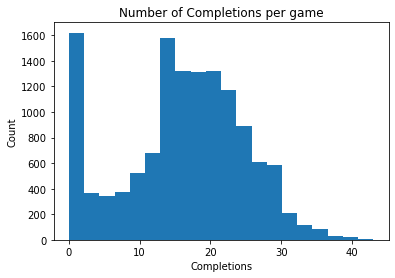

In [31]:
#histogram of cmp/completions

ax =df.cmp.plot(kind='hist', bins=20)
ax.set_xlabel("Completions")
ax.set_ylabel('Count')
ax.set_title('Number of Completions per game')

This histogram shows we have a lot of completions are either 0 or between 15-25.

### 3.7.2 Completion Percentage Histogram <a id='3.7.2_Completion_Percentage_Histogram'></a>

Text(0.5, 1.0, 'Number of Completion %')

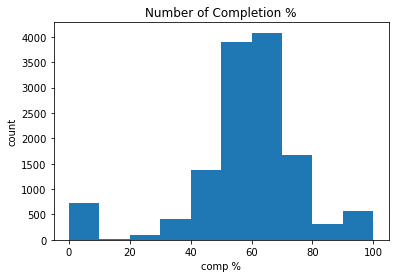

In [32]:
ax= df['comp %'].plot(kind='hist', bins=10)
ax.set_xlabel('comp %')
ax.set_ylabel('count')
ax.set_title('Number of Completion %')

Interesting we have a lot of completions in the 50-70% range. Probably due to a small amount of attempts.

### 3.7.3 Attempts Histogram <a id='3.7.3_Attempts_Histogram'></a>

Text(0.5, 1.0, 'Number of Completions')

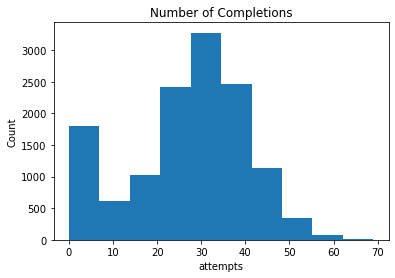

In [33]:
ax = df.att.plot(kind='hist', bins=10)
ax.set_xlabel('attempts')
ax.set_ylabel('Count')
ax.set_title('Number of Completions')

Many 0 and 20-40 attempt values.

### 3.7.4 Touchdown Histogram <a id='3.7.4_Touchdown_Histogram'></a>

Text(0.5, 1.0, 'Number of TDs')

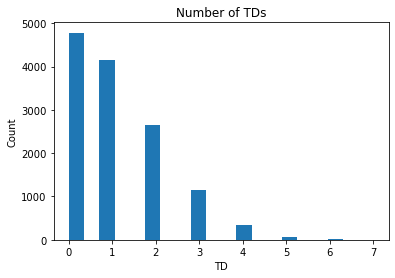

In [34]:
ax = df.td.plot(kind='hist', bins=20)
ax.set_xlabel('TD')
ax.set_ylabel('Count')
ax.set_title('Number of TDs')

Looks as if it the TD count desends drasticaly from 2-3 TDs a game. Many 0 and 1 counts.

### 3.7.5 Rate Histogram <a id='3.7.5_Rate_Histogram'></a>

Text(0.5, 1.0, 'Number of Rates')

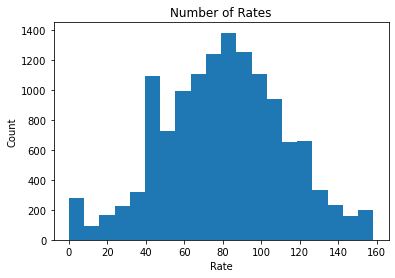

In [35]:
ax = df.rate.plot(kind='hist', bins=20)
ax.set_xlabel('Rate')
ax.set_ylabel('Count')
ax.set_title('Number of Rates')

The rate column is almost normally distributed, but it has a tail on the left. Many QBs rated between 70-110.

## 3.8 Distribution of Data <a id='3.8_Distribution_of_Data'></a>

Lets check how some of the variables interact with each other given a certain variable.

### 3.8.1 QB Rate & TDs <a id='3.8.1_QB_Rate_&_TDs'></a>

 First lets see what qb rates are for the different td values 0-7.

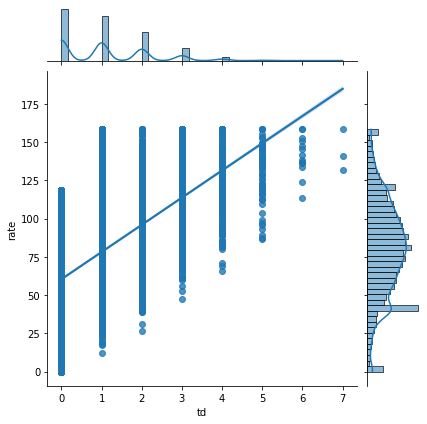

In [36]:
#plot of qb rates with the different td values
sns.jointplot(x='td', y='rate', data=df, kind="reg")

Looks as if there is a wide range of rates when a QB throws 0 tds and a small range that has a high rate when they throw 6-7 TDs.

### 3.8.2 The difference between Home and Away QB Ratings<a id='3.8.2_The_difference_between_Home_and_Away_QB_Ratings'></a>

Lets see what that difference is utilizing a histogram with two x variables.

In [37]:
#set up the home & away values
home = df[df['home_away']== 'home']
away= df[df['home_away']== 'away']

In [38]:
#home & away rates
home_rate= home['rate']
away_rate= away['rate']

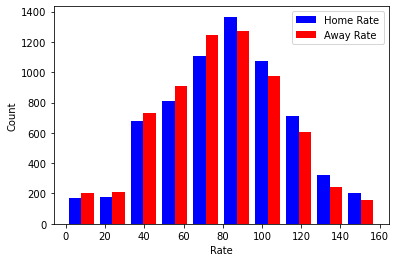

In [39]:
legend = ['Home Rate', 'Away Rate']
plt.hist([home_rate, away_rate], color=['blue', 'red'], bins=10)
plt.xlabel('Rate')
plt.ylabel('Count')
plt.legend(legend)

We have a normal distribution for the QB ratings. The home and away variable could have a high correlation between a good and bad rating that we are trying to create. The old rating never accounted for this variable. We should investigate how the other variables interact with the home and away variable. 

### 3.8.3  Home & Away Completion Percentage<a id='3.8.3_Home_&_Away_Completion_Percentage'></a>

In [40]:
#Set up the diferent home and away completion %
home_cmp_percent = home['comp %']
away_cmp_percent = away['comp %']

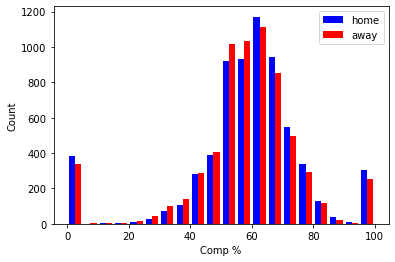

In [41]:
plt.hist([home_cmp_percent, away_cmp_percent], color=['blue', 'red'], bins=20)
plt.xlabel('Comp %')
plt.ylabel('Count')
plt.legend(['home', 'away'])

Not a significant difference between the home & away completion percentages. There were a few more home values where the QB completed 0, 65 & 90% of their passes.

### 3.8.4 Home & Away TDs<a id='3.8.4_Home_&_Away_TDs'></a>

In [42]:
#Set the home & away TD values
home_td = home['td']
away_td = away['td']

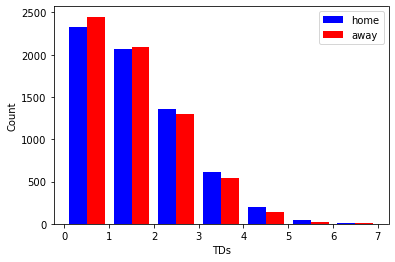

In [43]:
plt.hist([home_td, away_td], color=['blue', 'red'], bins=7)
plt.xlabel('TDs')
plt.ylabel('Count')
plt.legend(['home', 'away'])

We have more QBs throwing 2-5 TDs at home and more away QBs throwing 0-1 TDs.

## 3.9 Heat Map of QB Data <a id='3.9_Heat_Map_of_QB_Data'></a>

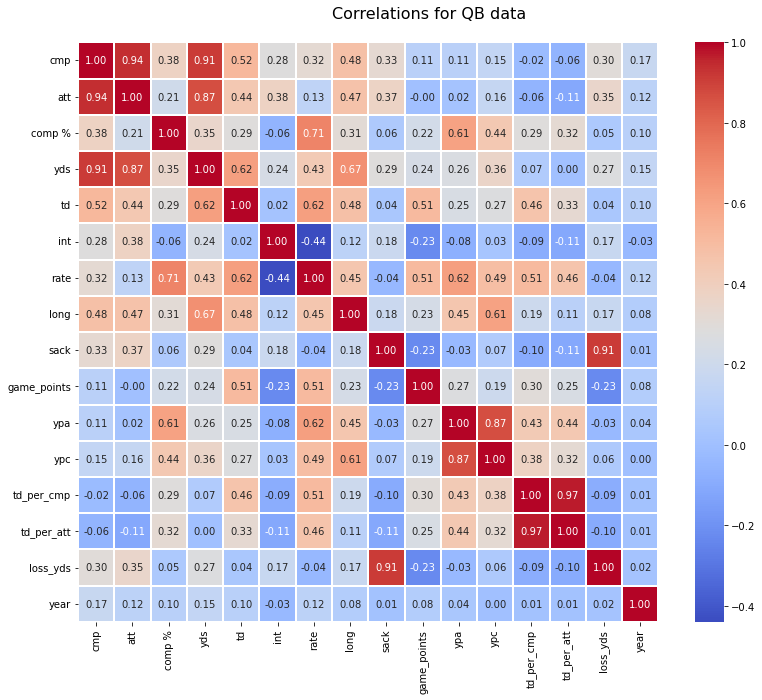

In [44]:
#create a heat map of our QB Data
corrmat= df.corr()
f, ax = plt.subplots(figsize= (13,10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=.05)
f.subplots_adjust(top=.93)
t= f.suptitle('Correlations for QB data', fontsize=16)

This heat map is very import in displaying which variables are closely related. 

Here are a few that have high correlations:
   
   1. Attempts & Completions .94 - Pretty obvious that atempts and completions go hand in hand.  
   2. Attempts & TDs .87 - more attempts the more likely you have a TD.
   3. Completions & Yards .91 - Complete a pass and gain yardage on the play.
   4. Attempts & yards .87 - More attempts more likely a yard is gain. slightly lower than than comp & yds.
   5. Sack & loss_yds .91 - When a QB takes a sack the QB lost yards on that particular play.
   6. Yards per Catch & Yards per Attempt .87 - More attempts more likely a catch with yards gained on the play.
   7. TD per Attempt & TD per completion .97 - These go hand in hand as well.
    
Negitive Correlations:
     
   1. Interceptions & Rate -.44 - QB ratings are are hindered when a player throws an interception.
   2. Game Points & Int -.23 - This is interesting. Even if the defense scores or a RB runs for a TD and the QB is not involve, the interception can effect the amount of points the team scores.
   3. Game Points & Sack -.23 - Even one sack can have an impact on how many team scores.
   4. Game Points & Loss yards -.23 - The lost of yards from a sack can impact the score as well.

## 3.10 Correlated Variables<a id='3.10_Correlated_Variables'></a>

Lets investigate the correlation between the certain columns using scatter plots.

### 3.10.1 Attempts & Completions .94  (Positive)<a id='3.10.1_Attempts_&_Completions_.94_(Positive)'></a>

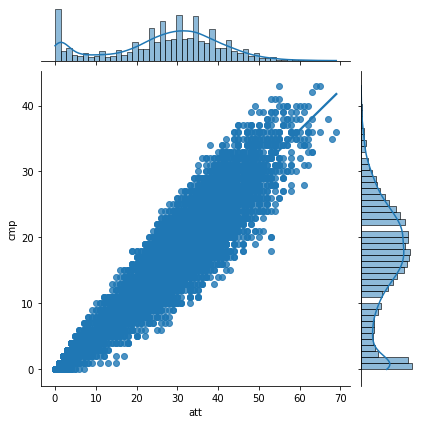

In [45]:
sns.jointplot(x='att', y='cmp', data=df, kind='reg')

This linear regression has a very positive correlation. As x increases so does y.

### 3.10.2 Sack & loss_yds .91  (Positive)<a id='3.10.2_Sack_&_loss_yds_.91_(Positive)'></a>

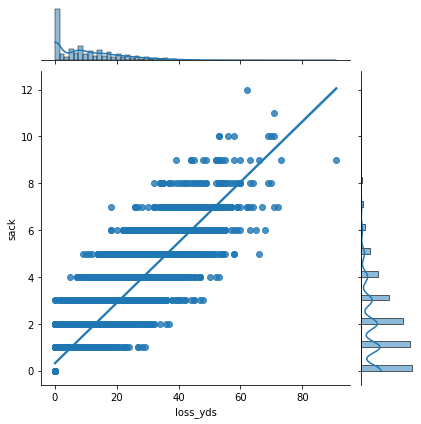

In [46]:
sns.jointplot(x='loss_yds', y='sack', data=df, kind='reg')

Looks as if there is a wide range of loss yards per sack, but with each sack the yards loss steadily increases.

### 3.10.3 Interceptions & Rate -.44 (Negative)<a id='3.10.3_Interceptions_&_Rate_-.44_(Negative)'></a>

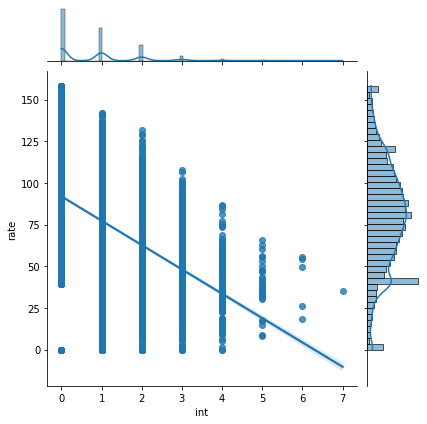

In [47]:
sns.jointplot(x='int', y='rate', data=df, kind='reg')

When you throw 1-2 interceptions the QB has a high range of QB ratings. The rating progressively goes down with each interception thrown to the other team.

### 3.10.4 Game Points & Loss yards -.23 <a id='3.10.4_Game_Points_&_Loss_yards_-.23'></a>

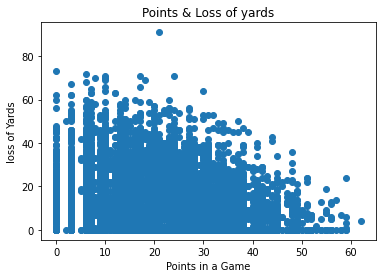

In [48]:
plt.scatter(df['game_points'], df['loss_yds'])
plt.xlabel('Points in a Game')
plt.ylabel('loss of Yards')
plt.title('Points & Loss of yards')
plt.show()

A negative correlation. As points ascend the loss of yards decreases. This is an inverse relationship.

## 3.10.5 Pair Plot of all QB Data <a id='3.10.5_Pair_Plot_of_all_QB_Data'></a>

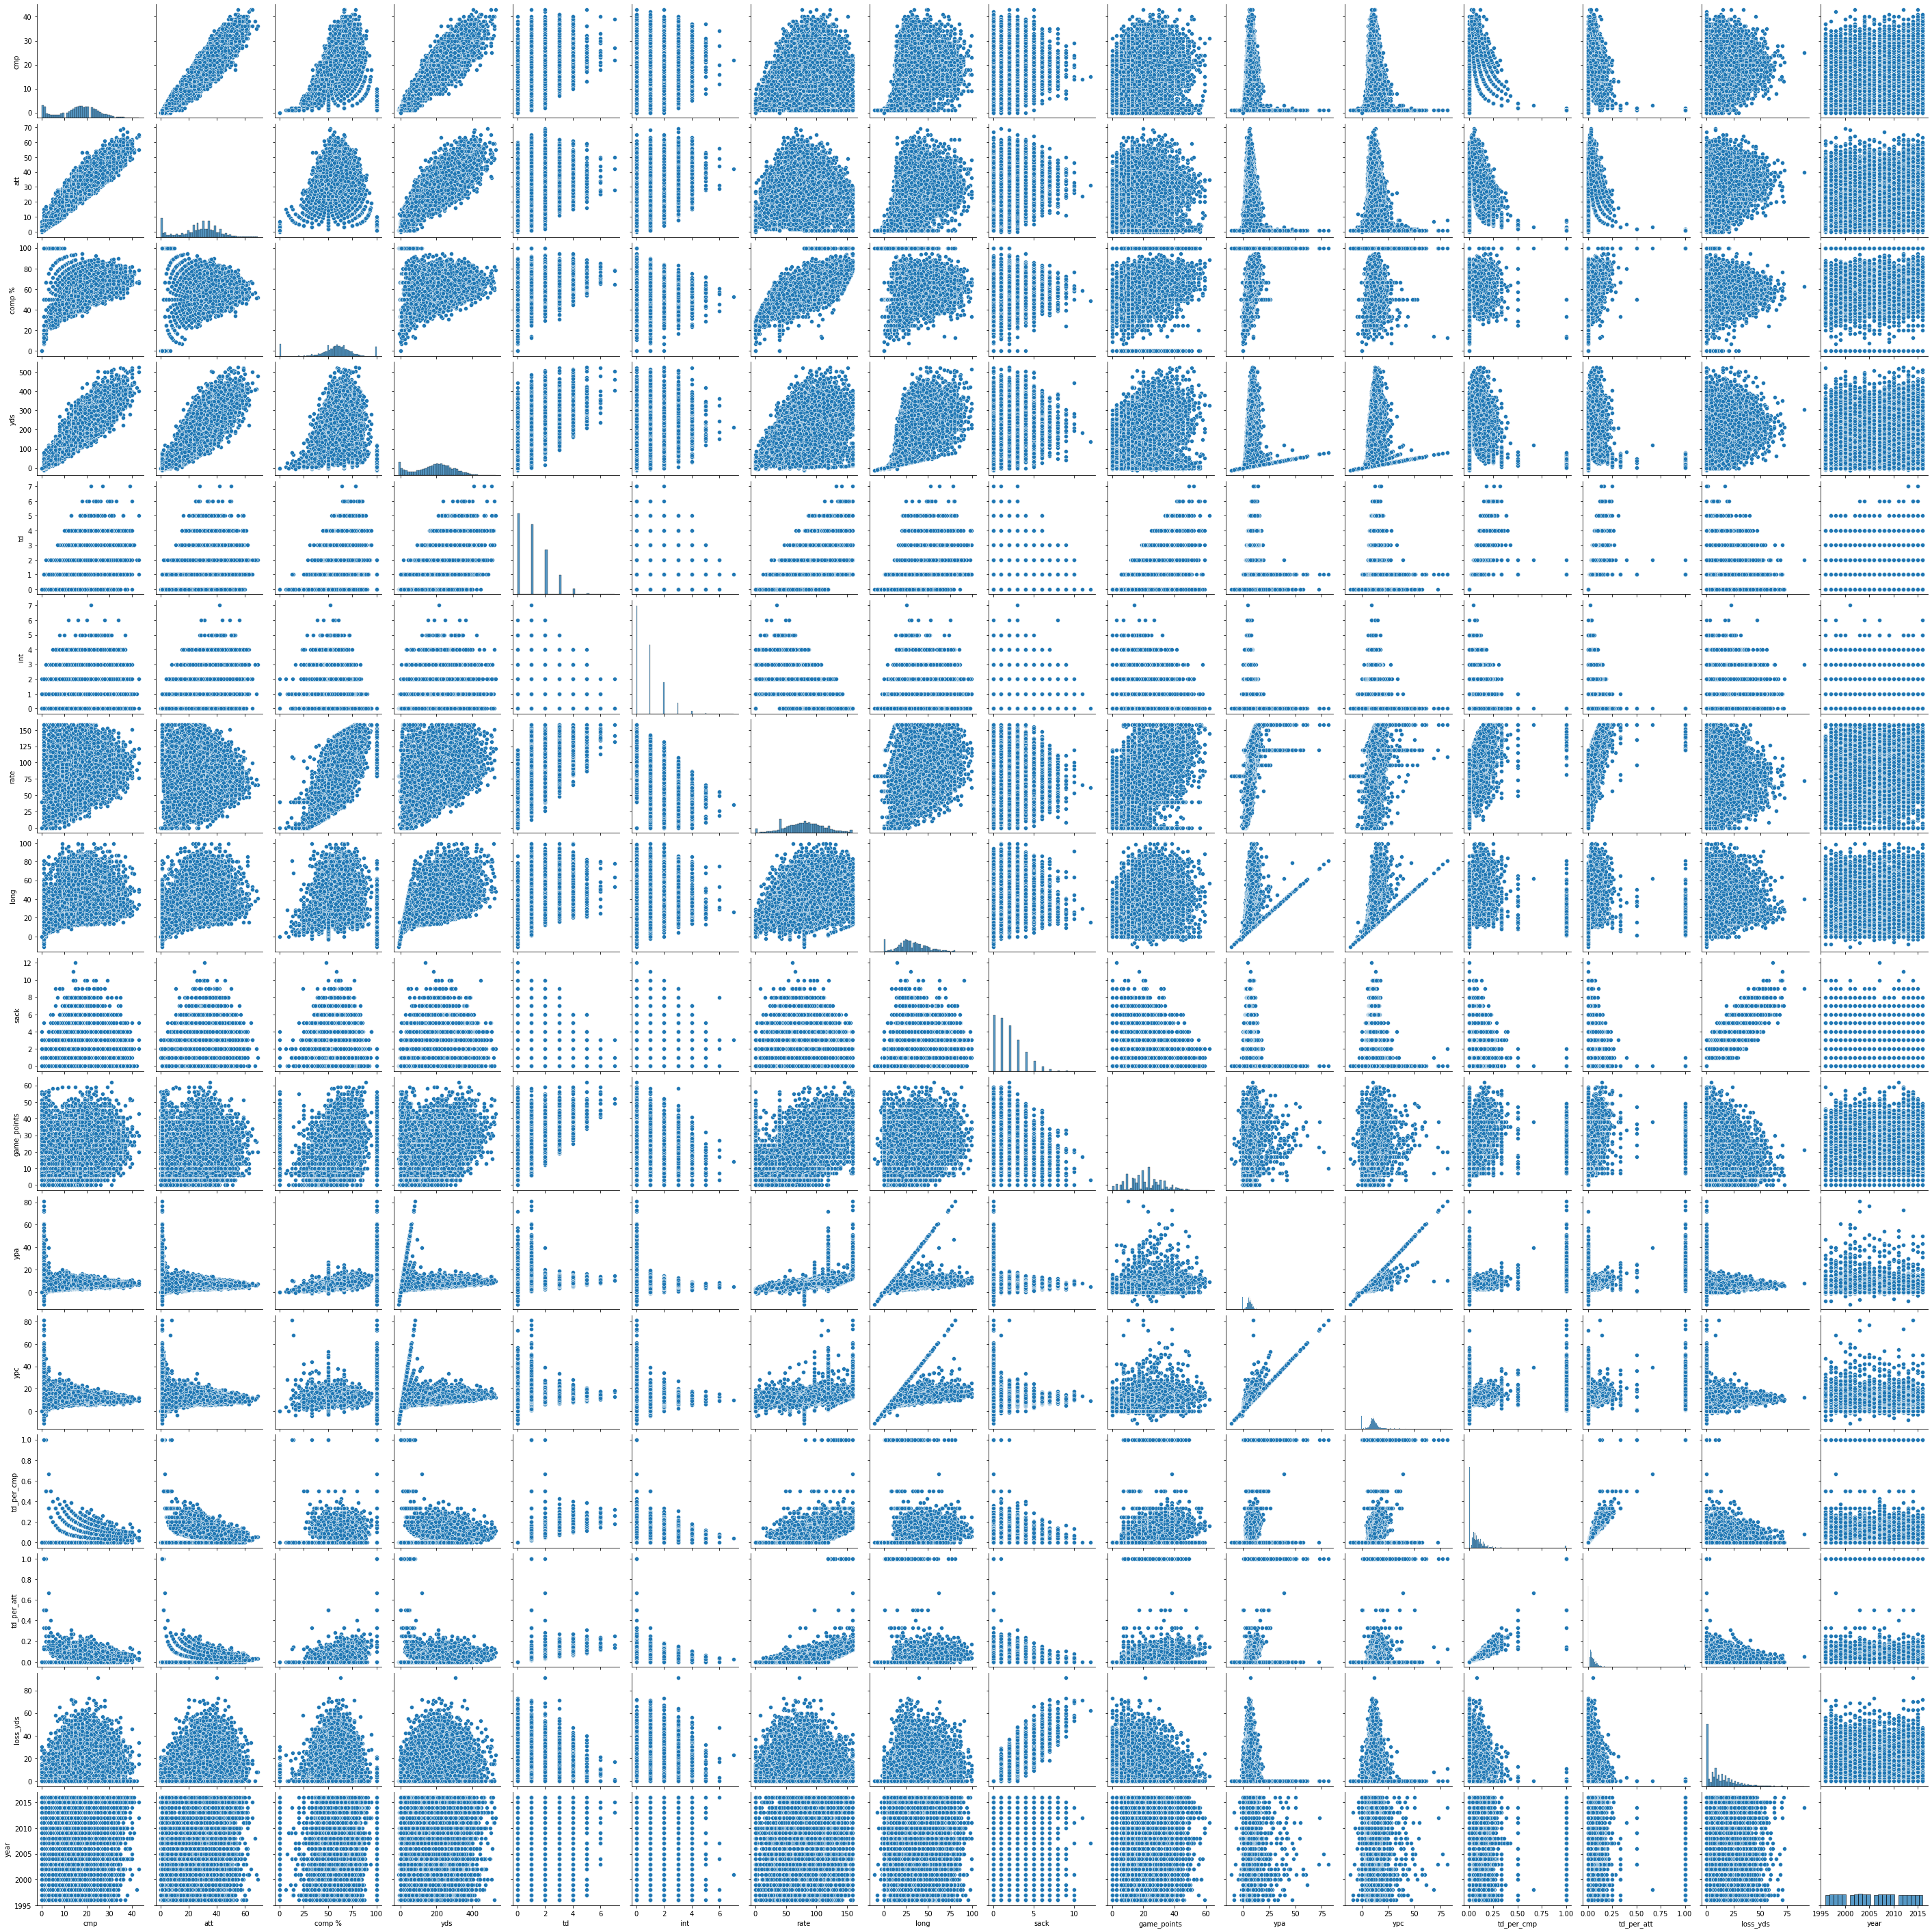

In [49]:
sns.pairplot(df, palette='set1')
plt.show()

## 3.10.6  Mean, Standard Deviation, Min, Max, 25, 50, 75th percentile <a id='3.10.6_Mean,_Standard_Deviation,_Min,_Max,_25,_50,_75th_percentile'></a>

In [50]:
df.describe()

cmp           att        comp %           yds            td  \
count  13172.000000  13172.000000  13172.000000  13172.000000  13172.000000   
mean      16.115852     26.894397     57.858890    186.358374      1.119268   
std        8.750427     13.573389     19.329136    105.499444      1.119726   
min        0.000000      0.000000      0.000000    -11.000000      0.000000   
25%       11.000000     20.000000     51.200000    115.000000      0.000000   
50%       17.000000     29.000000     60.000000    197.000000      1.000000   
75%       22.000000     36.000000     67.500000    260.000000      2.000000   
max       43.000000     69.000000    100.000000    527.000000      7.000000   

                int          rate          long          sack   game_points  \
count  13172.000000  13172.000000  13172.000000  13172.000000  13172.000000   
mean       0.801852     80.243754     33.348694      1.862967     21.380125   
std        0.970322     32.067092     18.299227      1.701104     10.664099   
min        0.000000      0.000000    -11.000000      0.000000      0.000000   
25%        0.000000     58.600000     22.000000      0.000000     13.000000   
50%        1.000000     80.950000     31.000000      2.000000     21.000000   
75%        1.000000    102.000000     44.000000      3.000000     28.000000   
max        7.000000    158.300000     99.000000     12.000000     62.000000   

                ypa           ypc    td_per_cmp    td_per_att      loss_yds  \
count  13172.000000  13172.000000  13172.000000  13172.000000  13172.000000   
mean       6.881020     11.155998      0.070880      0.047503     11.970316   
std        4.222849      5.072006      0.114867      0.103989     11.970053   
min      -11.000000    -11.000000      0.000000      0.000000      0.000000   
25%        5.200000      9.300000      0.000000      0.000000      0.000000   
50%        6.700000     11.100000      0.053000      0.031000      9.000000   
75%        8.100000     13.100000      0.100000      0.061000     18.000000   
max       81.000000     81.000000      1.000000      1.000000     91.000000   

               year  
count  13172.000000  
mean    2005.895156  
std        6.015571  
min     1996.000000  
25%     2001.000000  
50%     2006.000000  
75%     2011.000000  
max     2016.000000

## 3.11 Looking at the Dataframe <a id='3.11_Looking_at_the_Dataframe'></a>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13172 entries, 0 to 13184
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   qb           13172 non-null  object 
 1   cmp          13172 non-null  int64  
 2   att          13172 non-null  int64  
 3   comp %       13172 non-null  float64
 4   yds          13172 non-null  float64
 5   td           13172 non-null  int64  
 6   int          13172 non-null  int64  
 7   rate         13172 non-null  float64
 8   long         13172 non-null  float64
 9   sack         13172 non-null  float64
 10  game_points  13172 non-null  int64  
 11  ypa          13172 non-null  float64
 12  ypc          13172 non-null  float64
 13  td_per_cmp   13172 non-null  float64
 14  td_per_att   13172 non-null  float64
 15  loss_yds     13172 non-null  float64
 16  home_away    13172 non-null  object 
 17  year         13172 non-null  int64  
dtypes: float64(10), int64(6), object(2)
memory usa

In [52]:
df.head()

qb  cmp  att  comp %    yds  td  int  rate  long  \
0  Boomer EsiasonB. Esiason   25   38    65.8  237.0   0    0  82.9  20.0   
1   Jim HarbaughJ. Harbaugh   16   25    64.0  196.0   2    1  98.1  35.0   
2      Paul JustinP. Justin    5    8    62.5   53.0   0    0  81.8  30.0   
3      Jeff GeorgeJ. George   16   35    45.7  215.0   0    0  65.8  55.0   
4   Kerry CollinsK. Collins   17   31    54.8  198.0   2    0  95.9  30.0   

   sack  game_points  ypa   ypc  td_per_cmp  td_per_att  loss_yds home_away  \
0   2.0           13  6.2   9.5       0.000       0.000      11.0      away   
1   0.0           20  7.8  12.2       0.125       0.080       0.0      home   
2   1.0           20  6.6  10.6       0.000       0.000      11.0      home   
3   7.0            6  6.1  13.4       0.000       0.000      53.0      away   
4   4.0           29  6.4  11.6       0.118       0.065      12.0      home   

   year  
0  1996  
1  1996  
2  1996  
3  1996  
4  1996

## 3.12 Save the new Dataframe <a id='3.12_Save_the_new_Dataframe'></a>

In [53]:
df.to_csv('QB_stats_clean.csv')

## 3.13 Conclusion <a id='3.13_Conclusion'></a>

Here we cleaned up the data to give us a better set of data to work with. More importantly, we found out which variables have a strong & negative correlation. 

The strongest correlations were Attempts & Completions (.94), Attempts & TDs (.87), Completions & Yards (.91), Attempts & yards (.87), Sack & loss_yds (.91), Yards per Catch & Yards per Attempt (.87) and TD per Attempt & TD per completion (.97).

The largest negative correlations were Game Points & Sack (-.23), Game Points & Loss yards (-.23), Interceptions & Rate (-.44) 
Game Points & Int (-.23). Three of these included game points. Which would be very useful to a team as the more points you score the better odds you have of winning.

The distribution of the data showed us that many of the touchdowns thrown were in the range of 0-3 and that there was not many 4-7 touchdowns thrown in a game. Very hard to do. The distribution displayed also that most QBs had a rating of 80 and most of the other data points were equally distributed on either side. 

This will be useful to create a new QB rating that is based off of more varibles and to weight their correlations. Thus we can formulate a more accurate rating.